In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [22]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# plotting defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")

In [23]:

# Kaggle path for Titanic
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# Info and missing value counts
train.info()
print("\nMissing values in train:")
print(train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values in train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked 

In [25]:
# EDA (Exploratory Data Analysis)
# - Survival distribution
# - Sex vs Survival
# - Age distribution
# - Fare distribution
# - Correlation between numeric features



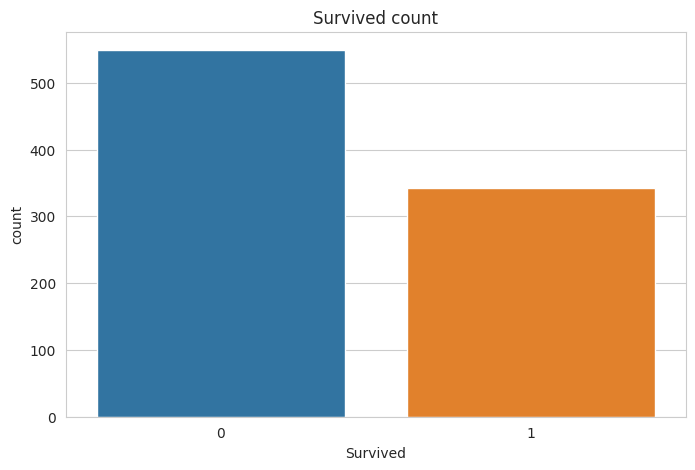

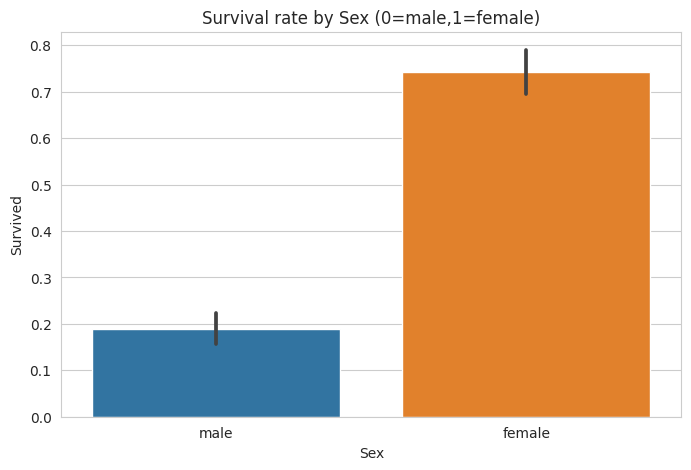

In [26]:
# Survival count
sns.countplot(x='Survived', data=train)
plt.title("Survived count")
plt.show()

# Sex vs Survived (percentage)
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival rate by Sex (0=male,1=female)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


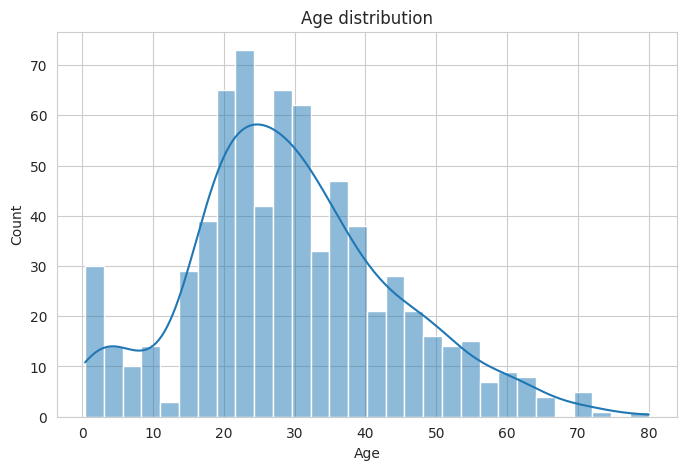

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


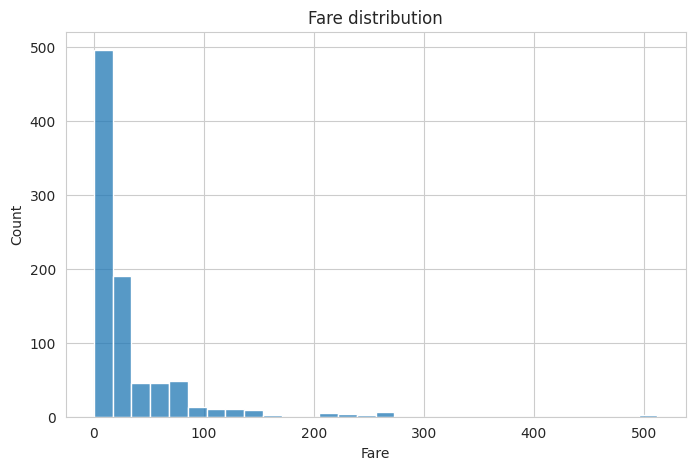

In [27]:
# Age distribution (with Nulls handled visually)
sns.histplot(train['Age'].dropna(), kde=True, bins=30)
plt.title("Age distribution")
plt.show()

# Fare distribution
sns.histplot(train['Fare'], bins=30)
plt.title("Fare distribution")
plt.show()


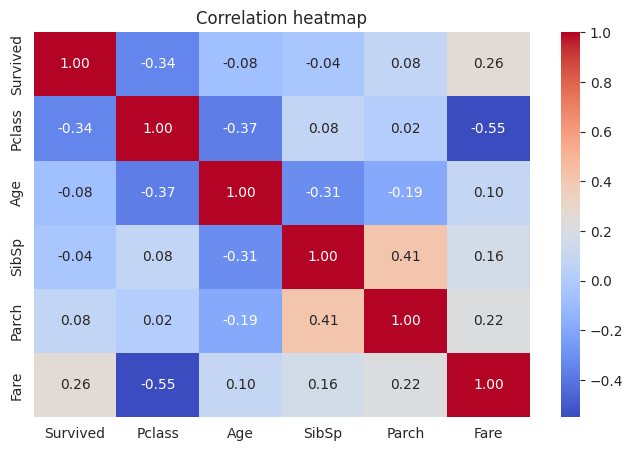

In [28]:
numeric_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.show()


In [29]:
## Preprocessing plan
1. Drop Cabin (bohot missing values) aur unnecessary cols (Name, Ticket).  
2. Fill missing Age with median (train median).  
3. Fill Embarked with mode.  
4. Map Sex -> numeric.  
5. Create dummy variables for Embarked (same columns in train/test).  
6. Select features: ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']


SyntaxError: invalid syntax (979085728.py, line 2)

In [ ]:
# Copy to avoid modifying original
tr = train.copy()

# 1. Drop columns we won't use
tr.drop(columns=['Cabin','Name','Ticket'], inplace=True)

# 2. Fill missing Age and Embarked
age_median = tr['Age'].median()
tr['Age'].fillna(age_median, inplace=True)
tr['Embarked'].fillna(tr['Embarked'].mode()[0], inplace=True)

# 3. Map Sex
tr['Sex'] = tr['Sex'].map({'male':0, 'female':1})

# 4. If Fare has missing (usually not in train) fill
tr['Fare'].fillna(tr['Fare'].median(), inplace=True)

# 5. One-hot encode Embarked (drop_first=True to keep two cols)
tr = pd.get_dummies(tr, columns=['Embarked'], drop_first=True)

# 6. Ensure our expected columns exist (Embarked_Q, Embarked_S)
for col in ['Embarked_Q','Embarked_S']:
    if col not in tr.columns:
        tr[col] = 0

# 7. Feature & target
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
X = tr[features]
y = tr['Survived']

print("Processed train shape:", X.shape)
X.head()


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
print("X_train:", X_train.shape, "X_val:", X_val.shape)


In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred_log), annot=True, fmt='d')
plt.show()
print("\nClassification Report:\n", classification_report(y_val, y_pred_log))


In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred_tree), annot=True, fmt='d')
plt.show()
print("\nClassification Report:\n", classification_report(y_val, y_pred_tree))

# Feature importances
imp = pd.Series(tree_model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature importances:\n", imp)
sns.barplot(x=imp.values, y=imp.index)
plt.title("Feature importances (Decision Tree)")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

log_cv = cross_val_score(LogisticRegression(max_iter=500), X, y, cv=5, scoring='accuracy')
tree_cv = cross_val_score(DecisionTreeClassifier(max_depth=5, random_state=42), X, y, cv=5, scoring='accuracy')

print("Logistic CV accuracies:", log_cv, "mean:", log_cv.mean())
print("Decision Tree CV accuracies:", tree_cv, "mean:", tree_cv.mean())


In [ ]:
## Prepare Test Set & Make Predictions
- Same preprocessing steps must be applied to test set (fill Age, Fare, map Sex, dummies).
- Ensure test has same feature columns as training data.
- Predict using best model (choose based on validation / CV).
- Create submission CSV with columns: PassengerId, Survived


In [ ]:
# Work on a copy
te = test.copy()

# Save PassengerId for submission
passenger_id = te['PassengerId']

# Drop unused cols
te.drop(columns=['Cabin','Name','Ticket'], inplace=True)

# Fill Age with train median
te['Age'].fillna(age_median, inplace=True)

# Fill Fare with train median (test has maybe one missing)
te['Fare'].fillna(tr['Fare'].median(), inplace=True)

# Fill Embarked with train mode if any missing
te['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Map Sex
te['Sex'] = te['Sex'].map({'male':0, 'female':1})

# Get dummies for Embarked (drop_first=True to match train)
te = pd.get_dummies(te, columns=['Embarked'], drop_first=True)

# Ensure both Embarked_Q and Embarked_S exist
for col in ['Embarked_Q','Embarked_S']:
    if col not in te.columns:
        te[col] = 0

# Select features in same order
X_test = te[features]
print("Processed test shape:", X_test.shape)
X_test.head()


In [ ]:
# Choose model for final prediction; here I use the logistic model (or swap to tree_model)
final_model = log_model  # or tree_model

test_preds = final_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": test_preds
})

submission.to_csv("submission.csv", index=False)
print("submission.csv saved. First rows:")
submission.head()
